In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

    
    
    
def Belief(State,p,r):
   
    equilibrium = r/(1-p+r);
    
    if State[0]== 0 and State[1]> 0:
            Belief = (r-r*(p-r)**(State[1]))/(1+r-p);
    elif State[0]== 1 and State[1]> 0:
            Belief = (r+(1-p)*(p-r)**(State[1]))/(1+r-p);
            
    else:
        
        Belief = equilibrium;

    return Belief;

def update(B,C,Reward,alpha,p,r,N):
    
    BeliefVector= [0.]*N;
    Y= [0.]*N;
    Action = [0]*N;
    Threshold = 0.;
    Seed = np.random.rand(N);
    
    for i in range(N):
        Y[i]= Belief(B[i],p,r);
    
    Y.sort();
    Threshold = Y[int((1-alpha)*N)];
    
    for i in range(N):
        BeliefVector[i]= Belief(B[i],p,r);
        
    
    #Get the Action vector.    
    h=0;
    for i in range(N):
        if BeliefVector[i]>= Threshold:
            Action[i]=1;
            h=h+1;
        if h >= alpha*N:
            break;
    
    #The update process.        

    for i in range(N):
        
            if Action[i] == 0 and B[i][1]>0:
                B[i][1]= B[i][1]+1;
                if C[i]==0:
                    if Seed[i]<r:
                        C[i]=1;
                    else:
                        C[i]=0;
                else:
                    if Seed[i]<p:
                        C[i]=1;
                    else:
                        C[i]=0;
                
                
                
               
             
            elif Action[i] == 0 and B[i][1]==0:
                if C[i]==0:
                    if Seed[i]<r:
                        C[i]=1;
                    else:
                        C[i]=0;
                else: 
                    if Seed[i]<p:
                        C[i]=1;
                    else:
                        C[i]=0;
            
            else:
                if C[i]==1:
                    B[i]= [1,1];
                    Reward = Reward + 1;
                    C[i]= int((Seed[i]<p)==True);
                    
                else:
                    B[i]= [0,1];
                    C[i]= int((Seed[i]<r)==True);
        
                    
    return Reward;
    
    
    
    
    

In [2]:
print(update([[1,2],[0,1],[0,3],[0,2],[0,0],[1,4],[1,3],[1,7],[0,4],[0,6]],[0,0,1,0,0,1,1,0,0,0],0,0.4,0.6,0.3,10));

2


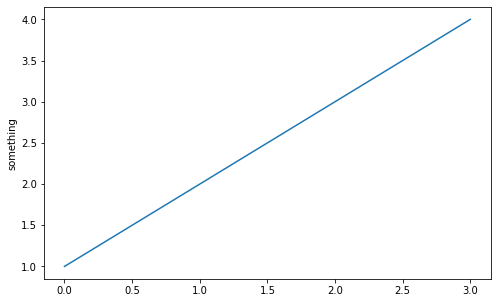

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure() 
fig.set_size_inches( 8,5) # To change the size 
plt.plot([1,2,3,4]) # This plot something
plt.ylabel('something')
plt.savefig('my_figure.jpg',bbox_inches='tight')


In [3]:
def onetrial(B,C,Reward,timesteps,alpha,p,r,N):

    for i in range(timesteps):
        Reward = update(B,C,Reward,alpha,p,r,N);
    return Reward;

In [4]:
print(onetrial([[1,2],[0,1],[0,3],[0,2],[0,0],[1,4],[1,3],[1,7],[0,4],[0,6]],[0,0,1,0,0,1,1,0,0,0],0,100,0.4,0.6,0.3,10));

211


In [5]:
def mc(B,Reward,ntrials,timesteps,alpha,p,r,N):
    equilibrium = r/(1-p+r);
    
    bigB = [B]*(ntrials);
    for i in range(ntrials):
        C = [0]*N;
        Seed = np.random.rand(N);
        for j in range(N):
            C[j]= int((Seed[j]< equilibrium) == True);
        Reward = onetrial(bigB[i],C,Reward,timesteps,alpha,p,r,N);
        
    lowerbound = 100*Reward/(timesteps*ntrials*N);
    
    print(lowerbound);


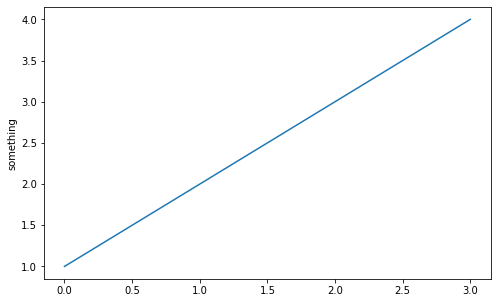

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure() 
fig.set_size_inches( 8,5) # To change the size 
plt.plot([1,2,3,4]) # This plot something
plt.ylabel('something')
plt.savefig('my_figure.pdf',bbox_inches='tight')

In [41]:
def bg(N):
    bg= mc([[0,0]]*N,0,500,1000,0.4,0.6,0.3,N);
    return bg;

y= [bg(5),bg(10),bg(15),bg(20),bg(25),bg(30),bg(35),bg(40),bg(45),bg(50),bg(100),bg(200)];

#For one class channel problem the BeliefGreedy performance is the same as the WhittleIndex policy performance!
    

20.33872
20.21696
20.163226666666667
20.20868
20.216864
20.245226666666667
20.235257142857144
20.23672
20.250186666666668
20.25182
20.294908
20.326599


In [14]:
def bg(N):
    bg= mc([[0,0]]*N,0,500,1000,0.4,0.7,0.4,N);
    return bg;

y= [bg(5),bg(10),bg(15),bg(20),bg(25),bg(30),bg(35),bg(40),bg(45),bg(50),bg(100),bg(200)];

#For one class channel problem the BeliefGreedy performance is the same as the WhittleIndex policy performance!
    

26.06116
25.96318
25.9484
25.95206
25.971944
25.9695
25.977765714285713
25.968345
25.989004444444443
25.99484
26.017948
26.067656
